In [8]:
import sys
sys.path.append("./../../src")
import pandas as pd
import numpy as np

import torch
from torch import nn, optim

In [9]:
from vae_with_dataloader import VAE, VAETrainerWithDataLoader
from icd_analysis_helper import ICDAnalysisHelper
from dataloader import MixehrICDImputationDataset
from visualizer_helper import Visualizer

from config_reader import Config
import os
import math
from sklearn.model_selection import train_test_split

In [10]:
###Load Configuration file
config = Config('./config.ini')
experiment_name=config.experiment_name
config.__dict__

{'patient_icd_path': '/data1/andrew/meng/mixehr/data/Mimic/andrew_outputs/PATIENT_ICD_BINARY.csv',
 'icd9codes_path': '/data1/andrew/meng/mixehr/data/Mimic/mimic-iii-clinical-database-1.4/D_ICD_DIAGNOSES.csv.gz',
 'subject_ids_path': '.',
 'experiment_name': '200213_patient_clusters_25_latent_dim_vae_with_larger_decoder',
 'encoder_dim': [(250, 500), (500, 250), (250, 100)],
 'latent_dim': 25,
 'decoder_dim': [(250, 500), (500, 250), (250, 100)],
 'use_relu_encoder': True,
 'use_relu_decoder': True,
 'kld_beta': 1.0}

In [5]:
###Load Data
patient_icd_df=pd.read_csv(config.patient_icd_path, sep=' ')
patient_icd_data = patient_icd_df.drop('SUBJECT_ID', axis=1)
data = torch.tensor(patient_icd_data.values).float()
print(data.shape)

batch_size=40
total_batches = patient_icd_data.shape[0] / batch_size
train_batches = math.ceil(0.8 * total_batches)
val_batches = int(total_batches - train_batches)

train_df, val_df = train_test_split(patient_icd_df, test_size = val_batches/total_batches)

train_data = train_df.drop("SUBJECT_ID", axis=1)
train_data = torch.tensor(train_data.values).float()

val_data = val_df.drop("SUBJECT_ID", axis=1)
val_data = torch.tensor(val_data.values).float()

torch.Size([46520, 6984])


In [6]:
icd9codes = pd.read_csv(config.icd9codes_path)
icd_analyzer = ICDAnalysisHelper(icd9codes_df = icd9codes, patient_icd_df = patient_icd_df)
#icd_analyzer.lookup_icds(icd9codes, ["4019", "41401"])

visualizer = Visualizer()

In [7]:
###Load Model
print("Feature_dim: {}".format(data.shape[1]))
model = VAE(
    feature_dim = data.shape[1], 
    encoder_dim = config.encoder_dim,
    latent_dim = config.latent_dim,
    decoder_dim = config.decoder_dim,
    use_relu_encoder= config.use_relu_encoder,
    use_relu_decoder= config.use_relu_decoder
)

optimizer = optim.Adam(model.parameters(), lr=0.001)
print(type(optimizer))

Feature_dim: 6984
<class 'torch.optim.adam.Adam'>


In [8]:
###Load Trainer
trainer = VAETrainer(
    model=model, 
    optimizer=optimizer,
    experiment_name=experiment_name,
    kld_beta=config.kld_beta
)

In [9]:
###Train Model
trainer.train(
    training_data=train_data,
    validation_data=val_data,
    epochs=80,
    batch_size=40,
    save_model_interval=5,
    clip_gradients=False
)

  0%|          | 0/931 [00:00<?, ?it/s]

Training with KLD Beta weight of 2.0


100%|██████████| 931/931 [00:19<00:00, 48.31it/s]


====> Epoch: 1 Average Training Loss: 10447.3033


  1%|          | 8/931 [00:00<00:11, 78.30it/s]

====> Epoch: 1 Average Validation Loss: 2502.5176


100%|██████████| 931/931 [00:13<00:00, 70.22it/s]


====> Epoch: 2 Average Training Loss: 2360.6719


  1%|          | 8/931 [00:00<00:11, 77.90it/s]

====> Epoch: 2 Average Validation Loss: 2265.9213


100%|██████████| 931/931 [00:13<00:00, 68.60it/s]


====> Epoch: 3 Average Training Loss: 2199.6633


  1%|          | 9/931 [00:00<00:11, 80.56it/s]

====> Epoch: 3 Average Validation Loss: 2154.2667


100%|██████████| 931/931 [00:13<00:00, 70.60it/s]


====> Epoch: 4 Average Training Loss: 2098.7576


  1%|          | 6/931 [00:00<00:16, 54.83it/s]

====> Epoch: 4 Average Validation Loss: 2066.8628


100%|██████████| 931/931 [00:13<00:00, 67.39it/s]


====> Epoch: 5 Average Training Loss: 2015.9325


  1%|          | 8/931 [00:00<00:11, 78.61it/s]

====> Epoch: 5 Average Validation Loss: 1993.1953


100%|██████████| 931/931 [00:10<00:00, 87.51it/s] 


====> Epoch: 6 Average Training Loss: 1945.2224


  1%|          | 9/931 [00:00<00:10, 89.67it/s]

====> Epoch: 6 Average Validation Loss: 1943.3030


100%|██████████| 931/931 [00:12<00:00, 76.04it/s]


====> Epoch: 7 Average Training Loss: 1898.9649


  1%|          | 9/931 [00:00<00:11, 82.61it/s]

====> Epoch: 7 Average Validation Loss: 1920.6718


100%|██████████| 931/931 [00:10<00:00, 92.47it/s] 


====> Epoch: 8 Average Training Loss: 1865.2233


  1%|          | 11/931 [00:00<00:08, 107.81it/s]

====> Epoch: 8 Average Validation Loss: 1896.5264


100%|██████████| 931/931 [00:09<00:00, 99.71it/s] 


====> Epoch: 9 Average Training Loss: 1836.7323


  1%|          | 11/931 [00:00<00:08, 106.43it/s]

====> Epoch: 9 Average Validation Loss: 1877.1948


100%|██████████| 931/931 [00:12<00:00, 74.74it/s]


====> Epoch: 10 Average Training Loss: 1807.6660


  1%|          | 8/931 [00:00<00:12, 75.72it/s]

====> Epoch: 10 Average Validation Loss: 1862.2792


100%|██████████| 931/931 [00:09<00:00, 102.16it/s]


====> Epoch: 11 Average Training Loss: 1782.7297


  1%|          | 11/931 [00:00<00:08, 105.77it/s]

====> Epoch: 11 Average Validation Loss: 1848.9989


100%|██████████| 931/931 [00:09<00:00, 101.23it/s]


====> Epoch: 12 Average Training Loss: 1758.0718


  1%|          | 9/931 [00:00<00:10, 84.87it/s]

====> Epoch: 12 Average Validation Loss: 1836.8224


100%|██████████| 931/931 [00:09<00:00, 99.06it/s] 


====> Epoch: 13 Average Training Loss: 1739.5701


  1%|          | 11/931 [00:00<00:08, 105.93it/s]

====> Epoch: 13 Average Validation Loss: 1827.8061


100%|██████████| 931/931 [00:09<00:00, 101.39it/s]


====> Epoch: 14 Average Training Loss: 1721.5747


  1%|          | 10/931 [00:00<00:09, 99.23it/s]

====> Epoch: 14 Average Validation Loss: 1826.8433


100%|██████████| 931/931 [00:10<00:00, 92.80it/s] 


====> Epoch: 15 Average Training Loss: 1705.6734


  1%|          | 10/931 [00:00<00:09, 97.76it/s]

====> Epoch: 15 Average Validation Loss: 1822.3181


100%|██████████| 931/931 [00:09<00:00, 102.12it/s]


====> Epoch: 16 Average Training Loss: 1693.6092


  1%|          | 11/931 [00:00<00:08, 106.49it/s]

====> Epoch: 16 Average Validation Loss: 1820.9335


100%|██████████| 931/931 [00:10<00:00, 88.55it/s] 


====> Epoch: 17 Average Training Loss: 1683.2180


  1%|          | 9/931 [00:00<00:10, 87.07it/s]

====> Epoch: 17 Average Validation Loss: 1818.8982


100%|██████████| 931/931 [00:10<00:00, 89.27it/s] 


====> Epoch: 18 Average Training Loss: 1671.2587


  1%|          | 11/931 [00:00<00:08, 107.36it/s]

====> Epoch: 18 Average Validation Loss: 1823.1221


100%|██████████| 931/931 [00:12<00:00, 72.52it/s] 


====> Epoch: 19 Average Training Loss: 1662.3086


  1%|          | 9/931 [00:00<00:10, 87.29it/s]

====> Epoch: 19 Average Validation Loss: 1826.8018


100%|██████████| 931/931 [00:13<00:00, 68.89it/s]


====> Epoch: 20 Average Training Loss: 1652.1022


  1%|          | 8/931 [00:00<00:11, 77.00it/s]

====> Epoch: 20 Average Validation Loss: 1829.7124


100%|██████████| 931/931 [00:11<00:00, 81.32it/s] 


====> Epoch: 21 Average Training Loss: 1644.8884


  1%|          | 10/931 [00:00<00:10, 92.04it/s]

====> Epoch: 21 Average Validation Loss: 1827.5948


100%|██████████| 931/931 [00:11<00:00, 80.64it/s]


====> Epoch: 22 Average Training Loss: 1635.3840


  1%|          | 6/931 [00:00<00:17, 53.32it/s]

====> Epoch: 22 Average Validation Loss: 1831.4913


100%|██████████| 931/931 [00:13<00:00, 69.35it/s]


====> Epoch: 23 Average Training Loss: 1626.7780


  1%|          | 9/931 [00:00<00:10, 85.38it/s]

====> Epoch: 23 Average Validation Loss: 1831.2222


100%|██████████| 931/931 [00:10<00:00, 91.51it/s] 


====> Epoch: 24 Average Training Loss: 1618.0671


  1%|          | 9/931 [00:00<00:10, 87.98it/s]

====> Epoch: 24 Average Validation Loss: 1831.4513


100%|██████████| 931/931 [00:09<00:00, 94.18it/s] 


====> Epoch: 25 Average Training Loss: 1611.2837


  1%|          | 9/931 [00:00<00:10, 86.65it/s]

====> Epoch: 25 Average Validation Loss: 1832.6448


100%|██████████| 931/931 [00:09<00:00, 97.64it/s] 


====> Epoch: 26 Average Training Loss: 1602.5499


  1%|          | 10/931 [00:00<00:09, 92.22it/s]

====> Epoch: 26 Average Validation Loss: 1836.7869


100%|██████████| 931/931 [00:11<00:00, 80.59it/s] 


====> Epoch: 27 Average Training Loss: 1596.5687


  1%|          | 6/931 [00:00<00:16, 56.08it/s]

====> Epoch: 27 Average Validation Loss: 1839.8947


100%|██████████| 931/931 [00:11<00:00, 80.70it/s]


====> Epoch: 28 Average Training Loss: 1591.0658


  1%|          | 9/931 [00:00<00:10, 86.68it/s]

====> Epoch: 28 Average Validation Loss: 1844.1357


100%|██████████| 931/931 [00:10<00:00, 85.31it/s] 


====> Epoch: 29 Average Training Loss: 1584.0556


  1%|          | 10/931 [00:00<00:09, 92.82it/s]

====> Epoch: 29 Average Validation Loss: 1848.6737


100%|██████████| 931/931 [00:10<00:00, 87.13it/s] 


====> Epoch: 30 Average Training Loss: 1578.4042


  1%|          | 6/931 [00:00<00:16, 56.98it/s]

====> Epoch: 30 Average Validation Loss: 1846.4996


100%|██████████| 931/931 [00:10<00:00, 91.66it/s] 


====> Epoch: 31 Average Training Loss: 1572.9081


  1%|          | 8/931 [00:00<00:11, 77.87it/s]

====> Epoch: 31 Average Validation Loss: 1850.3804


100%|██████████| 931/931 [00:12<00:00, 72.10it/s]


====> Epoch: 32 Average Training Loss: 1568.9943


  1%|          | 9/931 [00:00<00:10, 84.53it/s]

====> Epoch: 32 Average Validation Loss: 1853.1142


100%|██████████| 931/931 [00:12<00:00, 75.46it/s]


====> Epoch: 33 Average Training Loss: 1564.6527


  1%|          | 8/931 [00:00<00:13, 70.99it/s]

====> Epoch: 33 Average Validation Loss: 1856.3075


100%|██████████| 931/931 [00:11<00:00, 79.81it/s]


====> Epoch: 34 Average Training Loss: 1558.9431


  1%|          | 10/931 [00:00<00:10, 91.05it/s]

====> Epoch: 34 Average Validation Loss: 1863.6496


100%|██████████| 931/931 [00:11<00:00, 79.99it/s] 


====> Epoch: 35 Average Training Loss: 1556.4575


  1%|          | 10/931 [00:00<00:09, 97.73it/s]

====> Epoch: 35 Average Validation Loss: 1865.0541


100%|██████████| 931/931 [00:10<00:00, 87.36it/s] 


====> Epoch: 36 Average Training Loss: 1553.9036


  1%|          | 8/931 [00:00<00:11, 78.19it/s]

====> Epoch: 36 Average Validation Loss: 1868.3456


100%|██████████| 931/931 [00:13<00:00, 66.52it/s]


====> Epoch: 37 Average Training Loss: 1547.1474


  1%|          | 11/931 [00:00<00:09, 100.32it/s]

====> Epoch: 37 Average Validation Loss: 1870.9071


100%|██████████| 931/931 [00:10<00:00, 92.86it/s] 


====> Epoch: 38 Average Training Loss: 1543.8330


  1%|          | 11/931 [00:00<00:08, 109.24it/s]

====> Epoch: 38 Average Validation Loss: 1874.7196


100%|██████████| 931/931 [00:10<00:00, 87.25it/s] 


====> Epoch: 39 Average Training Loss: 1540.8013


  1%|          | 9/931 [00:00<00:10, 87.89it/s]

====> Epoch: 39 Average Validation Loss: 1880.0379


100%|██████████| 931/931 [00:11<00:00, 79.24it/s] 


====> Epoch: 40 Average Training Loss: 1537.2647


  1%|          | 9/931 [00:00<00:10, 87.28it/s]

====> Epoch: 40 Average Validation Loss: 1881.4571


100%|██████████| 931/931 [00:09<00:00, 100.49it/s]


====> Epoch: 41 Average Training Loss: 1533.3201


  1%|          | 11/931 [00:00<00:08, 108.19it/s]

====> Epoch: 41 Average Validation Loss: 1887.0212


100%|██████████| 931/931 [00:08<00:00, 104.43it/s]


====> Epoch: 42 Average Training Loss: 1529.7917


  1%|          | 9/931 [00:00<00:10, 88.51it/s]

====> Epoch: 42 Average Validation Loss: 1887.6142


100%|██████████| 931/931 [00:09<00:00, 102.18it/s]


====> Epoch: 43 Average Training Loss: 1527.6020


  1%|          | 11/931 [00:00<00:08, 107.95it/s]

====> Epoch: 43 Average Validation Loss: 1883.4198


100%|██████████| 931/931 [00:09<00:00, 100.52it/s]


====> Epoch: 44 Average Training Loss: 1522.9551


  1%|          | 11/931 [00:00<00:09, 101.16it/s]

====> Epoch: 44 Average Validation Loss: 1888.6595


100%|██████████| 931/931 [00:09<00:00, 102.48it/s]


====> Epoch: 45 Average Training Loss: 1520.1807


  1%|          | 11/931 [00:00<00:08, 108.18it/s]

====> Epoch: 45 Average Validation Loss: 1890.0761


100%|██████████| 931/931 [00:09<00:00, 98.64it/s] 


====> Epoch: 46 Average Training Loss: 1516.4574


  1%|          | 9/931 [00:00<00:10, 85.07it/s]

====> Epoch: 46 Average Validation Loss: 1892.8884


100%|██████████| 931/931 [00:09<00:00, 93.43it/s] 


====> Epoch: 47 Average Training Loss: 1514.2318


  1%|          | 9/931 [00:00<00:11, 83.01it/s]

====> Epoch: 47 Average Validation Loss: 1891.4172


100%|██████████| 931/931 [00:09<00:00, 95.51it/s] 


====> Epoch: 48 Average Training Loss: 1511.5196


  1%|          | 9/931 [00:00<00:10, 86.96it/s]

====> Epoch: 48 Average Validation Loss: 1895.0794


100%|██████████| 931/931 [00:09<00:00, 94.69it/s] 


====> Epoch: 49 Average Training Loss: 1509.9700


  1%|          | 11/931 [00:00<00:08, 107.61it/s]

====> Epoch: 49 Average Validation Loss: 1902.0764


100%|██████████| 931/931 [00:09<00:00, 95.10it/s] 


====> Epoch: 50 Average Training Loss: 1507.4600


  1%|          | 11/931 [00:00<00:08, 107.71it/s]

====> Epoch: 50 Average Validation Loss: 1899.4960


100%|██████████| 931/931 [00:08<00:00, 104.70it/s]


====> Epoch: 51 Average Training Loss: 1503.8017


  1%|          | 11/931 [00:00<00:08, 108.34it/s]

====> Epoch: 51 Average Validation Loss: 1906.9606


100%|██████████| 931/931 [00:09<00:00, 102.65it/s]


====> Epoch: 52 Average Training Loss: 1503.2063


  1%|          | 9/931 [00:00<00:10, 88.84it/s]

====> Epoch: 52 Average Validation Loss: 1905.1893


100%|██████████| 931/931 [00:09<00:00, 97.33it/s] 


====> Epoch: 53 Average Training Loss: 1500.4279


  1%|          | 11/931 [00:00<00:08, 104.47it/s]

====> Epoch: 53 Average Validation Loss: 1907.3050


100%|██████████| 931/931 [00:09<00:00, 98.56it/s] 


====> Epoch: 54 Average Training Loss: 1496.0969


  1%|          | 9/931 [00:00<00:10, 89.86it/s]

====> Epoch: 54 Average Validation Loss: 1907.3995


100%|██████████| 931/931 [00:10<00:00, 85.65it/s] 


====> Epoch: 55 Average Training Loss: 1494.7058


  1%|          | 8/931 [00:00<00:13, 70.09it/s]

====> Epoch: 55 Average Validation Loss: 1913.2782


100%|██████████| 931/931 [00:13<00:00, 67.60it/s]


====> Epoch: 56 Average Training Loss: 1493.4021


  1%|          | 7/931 [00:00<00:14, 65.49it/s]

====> Epoch: 56 Average Validation Loss: 1916.1292


100%|██████████| 931/931 [00:13<00:00, 70.56it/s]


====> Epoch: 57 Average Training Loss: 1491.2038


  1%|          | 10/931 [00:00<00:09, 94.13it/s]

====> Epoch: 57 Average Validation Loss: 1924.0690


100%|██████████| 931/931 [00:11<00:00, 79.63it/s]


====> Epoch: 58 Average Training Loss: 1489.3680


  1%|          | 10/931 [00:00<00:09, 92.85it/s]

====> Epoch: 58 Average Validation Loss: 1920.0648


100%|██████████| 931/931 [00:09<00:00, 96.62it/s] 


====> Epoch: 59 Average Training Loss: 1487.9287


  1%|          | 10/931 [00:00<00:09, 97.60it/s]

====> Epoch: 59 Average Validation Loss: 1916.0559


100%|██████████| 931/931 [00:13<00:00, 70.09it/s]


====> Epoch: 60 Average Training Loss: 1487.4773


  1%|          | 9/931 [00:00<00:11, 83.26it/s]

====> Epoch: 60 Average Validation Loss: 1927.5914


100%|██████████| 931/931 [00:13<00:00, 71.55it/s]


====> Epoch: 61 Average Training Loss: 1483.5608


  1%|          | 9/931 [00:00<00:10, 86.00it/s]

====> Epoch: 61 Average Validation Loss: 1926.0428


100%|██████████| 931/931 [00:12<00:00, 77.05it/s] 


====> Epoch: 62 Average Training Loss: 1482.1912


  1%|          | 8/931 [00:00<00:11, 79.89it/s]

====> Epoch: 62 Average Validation Loss: 1925.8173


100%|██████████| 931/931 [00:13<00:00, 67.69it/s]


====> Epoch: 63 Average Training Loss: 1480.6096


  1%|          | 9/931 [00:00<00:10, 89.79it/s]

====> Epoch: 63 Average Validation Loss: 1922.9753


100%|██████████| 931/931 [00:13<00:00, 70.43it/s]


====> Epoch: 64 Average Training Loss: 1479.8051


  1%|          | 10/931 [00:00<00:09, 94.26it/s]

====> Epoch: 64 Average Validation Loss: 1931.7732


100%|██████████| 931/931 [00:11<00:00, 80.28it/s] 


====> Epoch: 65 Average Training Loss: 1478.1022


  1%|          | 9/931 [00:00<00:10, 89.01it/s]

====> Epoch: 65 Average Validation Loss: 1933.1574


100%|██████████| 931/931 [00:09<00:00, 94.58it/s] 


====> Epoch: 66 Average Training Loss: 1475.9931


  1%|▏         | 12/931 [00:00<00:08, 110.57it/s]

====> Epoch: 66 Average Validation Loss: 1939.2035


100%|██████████| 931/931 [00:08<00:00, 106.44it/s]


====> Epoch: 67 Average Training Loss: 1474.6684


  1%|          | 11/931 [00:00<00:09, 100.11it/s]

====> Epoch: 67 Average Validation Loss: 1933.1442


100%|██████████| 931/931 [00:10<00:00, 87.83it/s] 


====> Epoch: 68 Average Training Loss: 1473.7950


  1%|          | 8/931 [00:00<00:12, 71.54it/s]

====> Epoch: 68 Average Validation Loss: 1942.6826


100%|██████████| 931/931 [00:10<00:00, 86.07it/s] 


====> Epoch: 69 Average Training Loss: 1472.5240


  1%|          | 8/931 [00:00<00:11, 77.58it/s]

====> Epoch: 69 Average Validation Loss: 1939.5609


100%|██████████| 931/931 [00:10<00:00, 85.28it/s] 


====> Epoch: 70 Average Training Loss: 1471.0612


  1%|          | 9/931 [00:00<00:10, 85.87it/s]

====> Epoch: 70 Average Validation Loss: 1940.3746


100%|██████████| 931/931 [00:09<00:00, 95.88it/s] 


====> Epoch: 71 Average Training Loss: 1469.4098


  1%|          | 11/931 [00:00<00:08, 108.19it/s]

====> Epoch: 71 Average Validation Loss: 1941.5799


100%|██████████| 931/931 [00:09<00:00, 97.31it/s] 


====> Epoch: 72 Average Training Loss: 1468.8281


  1%|          | 11/931 [00:00<00:08, 106.40it/s]

====> Epoch: 72 Average Validation Loss: 1947.7771


100%|██████████| 931/931 [00:08<00:00, 105.57it/s]


====> Epoch: 73 Average Training Loss: 1465.4797


  1%|          | 11/931 [00:00<00:08, 108.14it/s]

====> Epoch: 73 Average Validation Loss: 1948.2373


100%|██████████| 931/931 [00:09<00:00, 101.42it/s]


====> Epoch: 74 Average Training Loss: 1466.1895


  1%|          | 11/931 [00:00<00:08, 108.05it/s]

====> Epoch: 74 Average Validation Loss: 1951.7537


100%|██████████| 931/931 [00:08<00:00, 105.79it/s]


====> Epoch: 75 Average Training Loss: 1464.8605


  1%|          | 9/931 [00:00<00:10, 84.44it/s]

====> Epoch: 75 Average Validation Loss: 1955.7917


100%|██████████| 931/931 [00:09<00:00, 96.77it/s] 


====> Epoch: 76 Average Training Loss: 1461.5754


  1%|          | 11/931 [00:00<00:08, 109.57it/s]

====> Epoch: 76 Average Validation Loss: 1948.1877


100%|██████████| 931/931 [00:09<00:00, 100.46it/s]


====> Epoch: 77 Average Training Loss: 1462.7054


  1%|          | 10/931 [00:00<00:09, 92.21it/s]

====> Epoch: 77 Average Validation Loss: 1953.6824


100%|██████████| 931/931 [00:09<00:00, 100.81it/s]


====> Epoch: 78 Average Training Loss: 1461.1842


  1%|          | 11/931 [00:00<00:08, 108.79it/s]

====> Epoch: 78 Average Validation Loss: 1951.4310


100%|██████████| 931/931 [00:09<00:00, 100.19it/s]


====> Epoch: 79 Average Training Loss: 1459.6876


  1%|          | 11/931 [00:00<00:08, 108.17it/s]

====> Epoch: 79 Average Validation Loss: 1950.3208


100%|██████████| 931/931 [00:11<00:00, 80.60it/s]


====> Epoch: 80 Average Training Loss: 1460.5071
====> Epoch: 80 Average Validation Loss: 1954.7971


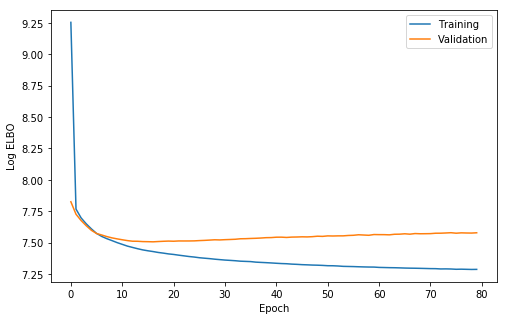

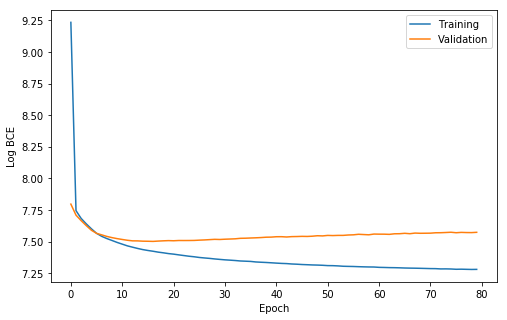

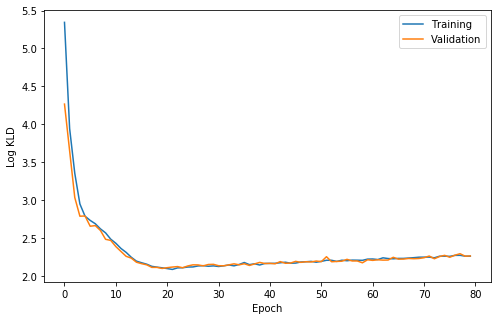

In [10]:
trainer.plot_elbo()
trainer.plot_bce()
trainer.plot_kld()

In [14]:
###Load pre-trained model
epoch = 40
model.load_state_dict(torch.load("./VAE_exp_{}_epoch_{}.pkl".format(experiment_name, epoch)))
trainer.model = model

In [ ]:
import pickle
####Get Encoded Data
#TRAINING
latent_train_file = "latent_train_exp_{}_epoch_{}.p".format(experiment_name, epoch)
if os.path.isfile(latent_train_file):
    print("latent training file found")
    latent_train = pickle.load(open(latent_train_file, 'rb'))

means_train_file = "means_train_exp_{}_epoch_{}.p".format(experiment_name, epoch)
if os.path.isfile(means_train_file):
    print("means training file found")
    means_train = pickle.load(open(means_train_file, 'rb'))
    
var_train_file = "var_train_exp_{}_epoch_{}.p".format(experiment_name, epoch)    
if os.path.isfile(var_train_file):
    print("vars training file found")
    vars_train = pickle.load(open(var_train_file, 'rb'))
    
#VALIDATION
latent_val_file = "latent_val_exp_{}_epoch_{}.p".format(experiment_name, epoch)
if os.path.isfile(latent_val_file):
    print("latent val file found")
    latent_val = pickle.load(open(latent_val_file, 'rb'))

means_val_file = "means_val_exp_{}_epoch_{}.p".format(experiment_name, epoch)
if os.path.isfile(means_val_file):
    print("means val file found")    
    means_val = pickle.load(open(means_val_file, 'rb'))
    
var_val_file = "var_val_exp_{}_epoch_{}.p".format(experiment_name, epoch)    
if os.path.isfile(var_val_file):
    print("vars val file found")
    vars_val = pickle.load(open(var_val_file, 'rb'))

In [11]:
###Encode data
latent, means, var = trainer.encode_data(data)
latent_train, means_train, vars_train = trainer.encode_data(train_data)
latent_val, means_val, vars_val = trainer.encode_data(val_data)

In [ ]:
import pickle

###TRAINING
latent_train_file = "latent_train_exp_{}_epoch_{}.p".format(experiment_name, epoch)
if not os.path.isfile(latent_train_file):
    pickle.dump(latent_train, open(latent_train_file, 'wb'))

means_train_file = "means_train_exp_{}_epoch_{}.p".format(experiment_name, epoch)
if not os.path.isfile(means_train_file):
    pickle.dump(means_train, open(means_train_file, 'wb'))
    
var_train_file = "var_train_exp_{}_epoch_{}.p".format(experiment_name, epoch)    
if not os.path.isfile(var_train_file):
    pickle.dump(vars_train, open(var_train_file, 'wb'))
    
###VALIDATION
latent_val_file = "latent_val_exp_{}_epoch_{}.p".format(experiment_name, epoch)
if not os.path.isfile(latent_val_file):
    pickle.dump(latent_val, open(latent_val_file, 'wb'))

means_val_file = "means_val_exp_{}_epoch_{}.p".format(experiment_name, epoch)
if not os.path.isfile(means_val_file):
    pickle.dump(means_val, open(means_val_file, 'wb'))
    
var_val_file = "var_val_exp_{}_epoch_{}.p".format(experiment_name, epoch)    
if not os.path.isfile(var_val_file):
    pickle.dump(vars_val, open(var_val_file, 'wb'))

In [12]:
###Get UMAP representations
X_umap = visualizer.umap_embedding(latent.cpu().detach().numpy())
X_umap_means = visualizer.umap_embedding(means.cpu().detach().numpy())
X_umap_vars = visualizer.umap_embedding(var.cpu().detach().numpy())

###Get UMAP representations TRAINING
X_umap_tr = visualizer.umap_embedding(latent_train.cpu().detach().numpy())
X_umap_means_tr = visualizer.umap_embedding(means_train.cpu().detach().numpy())
X_umap_vars_tr = visualizer.umap_embedding(vars_train.cpu().detach().numpy())

###Get UMAP representations VALIDATION
X_umap_val = visualizer.umap_embedding(latent_val.cpu().detach().numpy())
X_umap_means_val = visualizer.umap_embedding(means_val.cpu().detach().numpy())
X_umap_vars_val = visualizer.umap_embedding(vars_val.cpu().detach().numpy())

/data1/andrew/meng/mixehr/meng/VAE-EHR/src/visualizer_helper.py:18: UserWarning: Parameter should_downcast is deprecated, use convert_dtype in fit, fit_transform and transform  methods instead. 
  return UMAP(n_components=n_components).fit_transform(X)
/data1/andrew/meng/mixehr/meng/VAE-EHR/src/visualizer_helper.py:18: UserWarning: Parameter should_downcast is deprecated, use convert_dtype in fit, fit_transform and transform  methods instead. 
  return UMAP(n_components=n_components).fit_transform(X)


Occurences of heart before filter: 97
After: 77
Occurences of atrial before filter: 4
After: 4
Occurences of coronary before filter: 21
After: 18
Occurences of hypertension before filter: 61
After: 27
Occurences of vascular before filter: 116
After: 85
Total Relevant ICDs: 211
Patients with disease(s): 23610
Occurences of congenital before filter: 167
After: 86
Occurences of infant before filter: 38
After: 21
Occurences of newborn before filter: 117
After: 77
Occurences of neonatal before filter: 21
After: 18
Occurences of born before filter: 195
After: 94
Occurences of birth before filter: 173
After: 39
Total Relevant ICDs: 335
Patients with disease(s): 6936


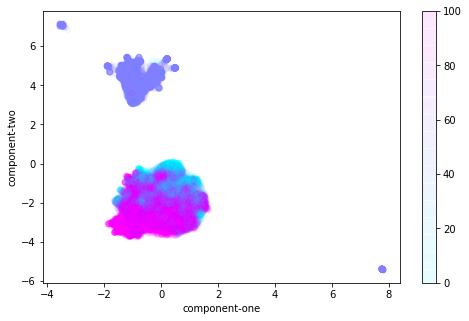

Occurences of heart before filter: 97
After: 77
Occurences of atrial before filter: 4
After: 4
Occurences of coronary before filter: 21
After: 18
Occurences of hypertension before filter: 61
After: 27
Occurences of vascular before filter: 116
After: 85
Total Relevant ICDs: 211
Patients with disease(s): 5900
Occurences of congenital before filter: 167
After: 86
Occurences of infant before filter: 38
After: 21
Occurences of newborn before filter: 117
After: 77
Occurences of neonatal before filter: 21
After: 18
Occurences of born before filter: 195
After: 94
Occurences of birth before filter: 173
After: 39
Total Relevant ICDs: 335
Patients with disease(s): 1729


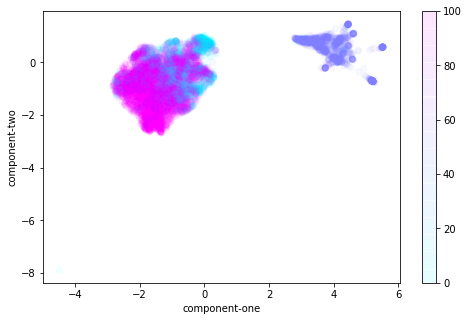

In [15]:
###Additional Visualizations
baby_keywords = ['congenital', 'infant', 'newborn', 'neonatal', 'born', 'birth']
heart_keywords = ['heart', 'atrial', 'coronary', 'hypertension', 'vascular']


heart_patient_idxs_tr = icd_analyzer.get_patients_idxs_with_disease_keywords(patient_df=train_df, 
                                                                             substrings=heart_keywords, 
                                                                             case_sensitive=False
                                                                            )
baby_patient_idxs_tr = icd_analyzer.get_patients_idxs_with_disease_keywords(patient_df=train_df,
                                                                            substrings=baby_keywords,
                                                                            case_sensitive=False
                                                                           )

baby_heart_colors_tr = np.array([0 for i in range(X_umap_tr.shape[0])])
baby_heart_colors_tr[heart_patient_idxs_tr] = 100
baby_heart_colors_tr[baby_patient_idxs_tr] = 50

visualizer.plot2d(
    X=X_umap_tr, 
    filename="Patient_Clusters_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_baby_heart_umap_train"), 
    colors=baby_heart_colors_tr)


heart_patient_idxs_val = icd_analyzer.get_patients_idxs_with_disease_keywords(patient_df=val_df, 
                                                                              substrings=heart_keywords,
                                                                              case_sensitive=False)
baby_patient_idxs_val = icd_analyzer.get_patients_idxs_with_disease_keywords(patient_df=val_df,
                                                                             substrings=baby_keywords,
                                                                             case_sensitive=False)

baby_heart_colors_val = np.array([0 for i in range(X_umap_val.shape[0])])
baby_heart_colors_val[heart_patient_idxs_val] = 100
baby_heart_colors_val[baby_patient_idxs_val] = 50
visualizer.plot2d(
    X=X_umap_val, 
    filename="Patient_Clusters_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_baby_heart_umap_val"), 
    colors=baby_heart_colors_val)

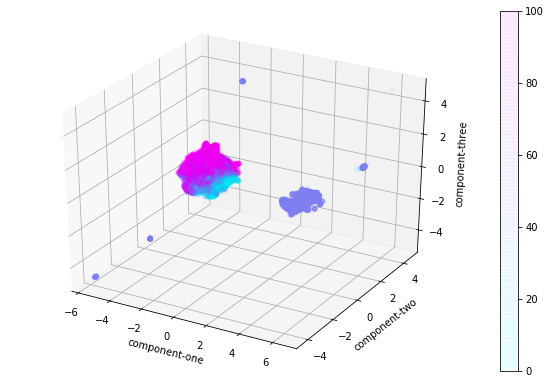

In [18]:
X_umap_3d_tr = visualizer.umap_embedding(latent_train.cpu().detach().numpy(), n_components=3)

visualizer.plot3d(
    X=X_umap_3d_tr, 
    filename="Patient_Clusters_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_heart_umap_3D_train"), 
    colors=baby_heart_colors_tr,
)

In [ ]:
###Plot UMAP representations
heart_patient_idxs = icd_analyzer.get_patients_idxs_with_disease_keywords(substrings=heart_keywords, case_sensitive=False)
heart_colors = np.array([0 for i in range(X_umap.shape[0])])
heart_colors[heart_patient_idxs] = 100

visualizer.plot2d(
    X=X_umap_tr, 
    filename="Patient_Clusters_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_heart_umap_train"), 
    colors=heart_colors,
)
visualizer.plot2d(
    X=X_umap_means_tr, 
    filename="Patient_Clusters_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_heart_umap_means_train"), 
    colors=heart_colors,
)
visualizer.plot2d(
    X=X_umap_vars_tr, 
    filename="Patient_Clusters_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_heart_umap_vars_train"), 
    colors=heart_colors,
)